In [15]:
import numpy as np
import pandas as pd
import json, os, glob
from os.path import join
import matplotlib.pyplot as plt
from collections import Counter
from usefull_function import make_numpy_array, get_all_labels, get_class, get_id_label_dict

%matplotlib inline

In [16]:
db_type = 'body'
json_dir= '../json/'
train_dir = '../train/'
train_labels = '../labels/train.csv'
val_labels = '../labels/validation.csv'
all_labels = '../labels/labels.csv'

files = os.listdir(json_dir)
#print(files)
labels = get_id_label_dict(train_labels, val_labels)
label_class_dict = get_all_labels(all_labels)

In [17]:
all_labels_red = []
_percentage = []
test_data = 0
for i, file in enumerate(files):
    #print(file)
    # If there is a file that is not a json (.DS_store wtf)
    if 'json' not in file:
        continue

    # Load the json file
    #print(file)
    fname = join(json_dir,file)
    #print(fname)
    with open(fname, encoding='utf-8-sig') as f:
        #print(f)
        json_all = json.load(f)

    if json_all['label'] == '?':
        test_data += 1
        continue

    json_data = json_all['data']
    #print(json_data)
    # Check the number of frames
    json_frames = sorted(json_data.keys())
    num_frames = len(json_frames)
    #print(num_frames)

    if int(json_frames[-1]) > 38 | int(json_frames[-1]) < 30:
        continue

    no_person = 0
    for k in json_frames:
        try:
            person = json_data[k][0]
        except:
            no_person += 1
            continue

    if no_person/num_frames > .2:
        continue

    result = make_numpy_array(json_all, db_type)

    output_dir = join(train_dir,db_type,file[:-5])

    ## Uncomment the line below if you actually want to save the data.
    np.save(output_dir, result) 


    # Check the label
    all_labels_red.append(json_all['label'])


121


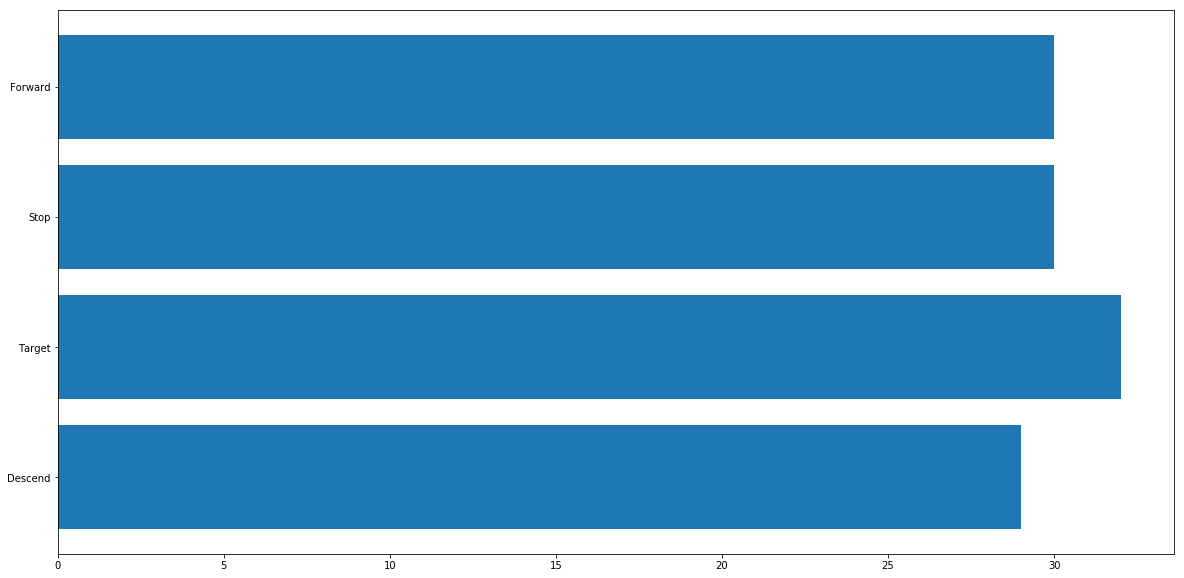

In [18]:
print(len(all_labels_red))
count = Counter(all_labels_red)
x, y = count.keys(), count.values()
plt.figure(figsize= (20,10))
plt.barh(list(range(len(x))), list(y))
_ = plt.yticks(list(range(len(x))),list(x))